<h1>Multifile LDA -- Beer Analysis</h1>

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import pylab as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display, HTML

import os
import sys
basedir = '..'
sys.path.append(basedir)

from multifile_analysis import MultifileAnalysis
from multifile_viz import MultifileLDAViz
sns.set_style("whitegrid", {'axes.grid' : False})

/home/joewandy/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


<h2>1a. Extract features and run LDA</h2>

Create a new multifile LDA object and load the MS1 and MS2 input files for beer1, 2, 3 and QC.

In [2]:
input_set = [
    ('input/Beer1pos_MS1filter_Method3_ms1.csv', 'input/Beer1pos_MS1filter_Method3_ms2.csv'),
    ('input/Beer2pos_MS1filter_Method3_ms1.csv', 'input/Beer2pos_MS1filter_Method3_ms2.csv'),
    ('input/Beer3pos_MS1filter_Method3_ms1.csv', 'input/Beer3pos_MS1filter_Method3_ms2.csv'),
    ('input/BeerQCpos_MS1filter_Method3_ms1.csv','input/BeerQCpos_MS1filter_Method3_ms2.csv'),
]

In [3]:
analysis = MultifileAnalysis()

scaling_factor=10           # previously set to 100 in the single file LDA 
fragment_grouping_tol=7     # grouping tolerance in ppm for the fragment
loss_grouping_tol=12        # grouping tolerance in ppm for the neutral loss
loss_threshold_min_count=15 # min. counts of loss values to occur
loss_threshold_max_val=200  # max. loss values

analysis.load_data(input_set, scaling_factor, fragment_grouping_tol, loss_grouping_tol,
            loss_threshold_min_count, loss_threshold_max_val, input_type='filename')

Loading input/Beer1pos_MS1filter_Method3_ms1.csv
Loading input/Beer1pos_MS1filter_Method3_ms2.csv
Loading input/Beer2pos_MS1filter_Method3_ms1.csv
Loading input/Beer2pos_MS1filter_Method3_ms2.csv
Loading input/Beer3pos_MS1filter_Method3_ms1.csv
Loading input/Beer3pos_MS1filter_Method3_ms2.csv
Loading input/BeerQCpos_MS1filter_Method3_ms1.csv
Loading input/BeerQCpos_MS1filter_Method3_ms2.csv
Processing fragments for file 0
Processing fragments for file 1
Processing fragments for file 2
Processing fragments for file 3
Total groups=6249
Processing losses for file 0
Processing losses for file 1
Processing losses for file 2
Processing losses for file 3
Total groups=31
6249 fragment words
31 loss words
Initialising dense dataframe 0
Initialising dense dataframe 1
Initialising dense dataframe 2
Initialising dense dataframe 3
Populating dataframes
Populating dataframe for fragment group 0/6249
Populating dataframe for fragment group 100/6249
Populating dataframe for fragment group 200/6249
Pop

Run multi-file LDA

In [4]:
K = 300
n_samples = 1000
n_burn = 0
n_thin = 1
alpha = 50.0/K
beta = 0.1
lda = analysis.run(K, alpha, beta, n_burn, n_samples, n_thin)

Initialising 
 - file 0 .................................................................................................................................
 - file 1 .............................................................................................................................................................
 - file 2 ...............................................................................................................................................
 - file 3 .........................................................................................................................................

Using Numpy for multi-file LDA sampling
Sample      1 ..  Log likelihood = -339571.483 
Sample      2 ..  Log likelihood = -324864.626 
Sample      3 ..  Log likelihood = -312860.140 
Sample      4 ..  Log likelihood = -300299.735 
Sample      5 ..  Log likelihood = -288958.762 
Sample      6 ..  Log likelihood = -278801.484 
Sample      7 ..  Log likelihood = -268155.934 

Seems to have converged after 100 samples or so ..

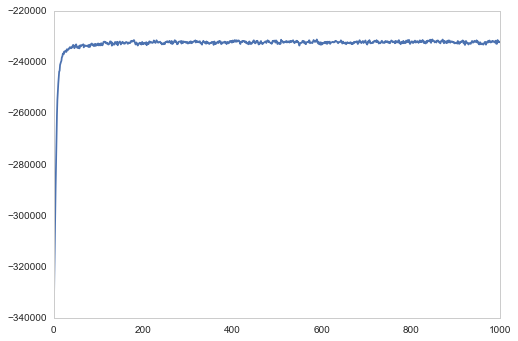

In [5]:
plt.plot(lda.log_likelihoods)

Save the LDA results for analysis later

In [6]:
lda.save_project('results/beer_analysis.project', 'Initial analysis of all 4 beer runs by Joe')

Project saved to results/beer_analysis.project time taken = 3.57399082184


<h1>1b. Load existing LDA results</h1>

Load the LDA results above

In [ ]:
lda = MultifileLDA.resume_from('results/beer_analysis.project')
print lda.last_saved_timestamp, lda.message

Here we set some arbitrary threshold values on these document-to-topic and topic-to-word distributions.

In [ ]:
lda.do_thresholding(th_doc_topic=0.05, th_topic_word=0.01)

Print the top words in each topic above the threshold values set before.

In [ ]:
_ = lda.get_top_words()

<h1>2. Results</h1>

Create a plotting object

In [ ]:
plotter = MultifileLDAViz(lda)
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

<h2>a. Ferulic Acid</h2>

From our previous results with running LDA independently for each file, we have identified the following words to be characteristic of the Ferulic acid topics:

|Word|
|----|
|fragment_177.0547|
|fragment_145.0284|
|fragment_89.0386|
|fragment_117.0331|
|fragment_149.0599|

By manual inspection, topic 229 in the multi-file LDA results seems to correspond to the set of words above.

In [ ]:
k = 229

Plot how many documents can be explained by this topic (degree) in each file above the set threshold. We expect similar numbers to the table below, obtained from running LDA independently on each file from before:

|File|Degree|
|--|--------|
|Beer1|11|
|Beer2|11|
|Beer3|11|
|Beer4|10|

In [ ]:
plotter.plot_motif_degrees([k])

Additionally, we can also plot the probabilities of seeing this topic across multiple files.

In [ ]:
_ = plotter.plot_e_alphas([k])

Plot of all the documents across the 4 collections that can be explained by this topic.

In [ ]:
plotter.plot_docs(k)

<h2>b. Histidine</h2>

Previous histidine topics consists of:

|Word|
|----|
|fragment_110.0718|
|fragment_156.0769|
|fragment_93.0450|
|fragment_95.0608|

Previous degrees:

|File|Degree|
|--|-----|
|Beer1|19|
|Beer2|27|
|Beer3|21|
|Beer4|25|

In [ ]:
k = 237

In [ ]:
plotter.plot_motif_degrees([k])

In [ ]:
_ = plotter.plot_e_alphas([k])

In [ ]:
plotter.plot_docs(k)

<h2>c. Leucine</h2>

Previous Leucine topics consists of:

|Word|
|----|
|fragment_86.0965|
|fragment_132.1015|

Previous degrees:

|File|Degree|
|--|-------------------------------|
|Beer1|61|
|Beer2|101|
|Beer3|66|
|Beer4|38|

In [ ]:
plotter.plot_motif_degrees([k])

In [ ]:
_ = plotter.plot_e_alphas([k])

In [ ]:
k = 91
plotter.plot_docs(k)

<h2>d. Asparagine</h2>

Previous Asparagine topics consists of:

|Word|
|----|
|fragment_74.0235|
|fragment_88.0392|
|fragment_70.0290|
|fragment_87.0554|
|fragment_133.0615|
|fragment_116.0344|

Previous degrees (prevalent in Beer3):

|File|Degree|
|--|-------------------------------|
|Beer1|6|
|Beer2|9|
|Beer3|17|
|Beer4|-|

In [ ]:
plotter.plot_motif_degrees([k])

In [ ]:
_ = plotter.plot_e_alphas([k])

In [ ]:
k = 175
plotter.plot_docs(k)

<h2>e. Asparagine</h2>

Previous Adenine topics consist of:

|Word|
|----|
|fragment_136.0629|
|fragment_119.0351|

Previous degrees (prevalent in Beer3)

|File|Degree|
|--|-------------------------------|
|Beer1|15|
|Beer2|23|
|Beer3|32|
|Beer4|19|

In [ ]:
plotter.plot_motif_degrees([k])

In [ ]:
_ = plotter.plot_e_alphas([k])

In [ ]:
k = 20
plotter.plot_docs(k)

<h1>3. TODO</h1>

- Faster Gibbs sampling (it takes hours to run now).
- Reduce memory usage. Use sparse matrices / dictionaries to store the probabilities.
- When saving the results, we should only save the data that we need, instead of dumping the whole LDA object out -- which will break when we change the LDA object in the future.
- Interactive visualisation of the results, either as standalone or in PiMP/Frank.
- Differential analysis, i.e. PLAGE.
- Query topics and spectra against NIST/MassBank for quick annotation & identification.